In [45]:
%run utils.ipynb

In [46]:
df = spark.read.csv('VGP-week3-data.csv', inferSchema=True, header=True, timestampFormat='yyyy-MM-dd HH:mm:ss+ss')

In [47]:
# Show the top 10 rows
df.show(100)

+------+--------------+--------------------+----------------+----------------+-----+----+-----+----+----+--------+-----+
|kit_id|participant_id|                time|             lat|             lon|PM2.5|PM10|PM1.0| NO2|  BC|activity|event|
+------+--------------+--------------------+----------------+----------------+-----+----+-----+----+----+--------+-----+
|    80|       9999964|2019-11-14 09:00:...|48.7717766666667|        2.006005| NULL|NULL| NULL|NULL|NULL|    NULL| NULL|
|    80|       9999964|2019-11-14 09:00:...|48.7717766666667|        2.006005| NULL|NULL| NULL|NULL|NULL|    NULL| NULL|
|    80|       9999964|2019-11-14 09:00:...|48.7717766666667|        2.006005| NULL|NULL| NULL|NULL|NULL|    NULL| NULL|
|    80|       9999964|2019-11-14 09:00:...|48.7717766666667|        2.006005| NULL|NULL| NULL|NULL|NULL|    NULL| NULL|
|    80|       9999964|2019-11-14 09:00:...|48.7717766666667|        2.006005| NULL|NULL| NULL|NULL|NULL|    NULL| NULL|
|    80|       9999964|2019-11-1

In [48]:
# Print the schema of `df`
df.printSchema()

root
 |-- kit_id: integer (nullable = true)
 |-- participant_id: integer (nullable = true)
 |-- time: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- lon: double (nullable = true)
 |-- PM2.5: string (nullable = true)
 |-- PM10: string (nullable = true)
 |-- PM1.0: string (nullable = true)
 |-- NO2: string (nullable = true)
 |-- BC: string (nullable = true)
 |-- activity: string (nullable = true)
 |-- event: string (nullable = true)



In [49]:
df.describe().show()

+-------+------------------+-----------------+--------------------+--------------------+-------------------+-----------------+-----------------+-----------------+------------------+-----------------+--------+-------------------+
|summary|            kit_id|   participant_id|                time|                 lat|                lon|            PM2.5|             PM10|            PM1.0|               NO2|               BC|activity|              event|
+-------+------------------+-----------------+--------------------+--------------------+-------------------+-----------------+-----------------+-----------------+------------------+-----------------+--------+-------------------+
|  count|             59972|            59972|               59972|               59972|              59972|            59972|            59972|            59972|             59972|            59972|   59972|              59972|
|   mean| 82.62947708930834|9596114.878259854|                null|  48.799958879913

In [50]:
df.columns

['kit_id',
 'participant_id',
 'time',
 'lat',
 'lon',
 'PM2.5',
 'PM10',
 'PM1.0',
 'NO2',
 'BC',
 'activity',
 'event']

In [53]:
dfcol = df.toPandas()
dfcol.plot.bar(x=dfcol['PM10'], legend=True)
plt.show()

KeyError: "None of [Index(['NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL',\n       'NULL',\n       ...\n       'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL',\n       'NULL'],\n      dtype='object', length=59972)] are in the [columns]"

In [6]:
df = df.withColumnRenamed("PM2.5", "PM2")
df = df.withColumnRenamed("PM1.0", "PM1")

In [7]:

# "NULL"= "0"
# Bureau = 1
# Parc = 2
# Domicile = 3
# Magasin = 4
# Métro = 5
# Restaurant = 6
# Rue = 7
# Voiture = 8
# "Arrêter De Cuisiner"= "1"
# "Repos"= "2"
# "Fermeture De Fenêtre"= "3"
# "Fumer"= "4"
# "Ouverture De Fenêtre"= "5"
# "Marcher"= "6"

def fromQualitativeToQuanlitative(df):
            df = df.withColumn('PM2', when(df.PM2=="NULL", "0").otherwise(df.PM2))
            df = df.withColumn('PM10', when(df.PM10=="NULL", "0").otherwise(df.PM10))
            df = df.withColumn('PM1', when(df.PM1=="NULL", "0").otherwise(df.PM1))
            df = df.withColumn('NO2', when(df.NO2=="NULL", "0").otherwise(df.NO2))
            df = df.withColumn('BC', when(df.BC=="NULL", "0").otherwise(df.BC))
        
            df = df.withColumn('activity', when(df.activity=="NULL", "0").otherwise(df.activity))
            df = df.withColumn('activity', when(df.activity=="Bureau", "1").otherwise(df.activity))
            df = df.withColumn('activity', when(df.activity=="Parc", "2").otherwise(df.activity))
            df = df.withColumn('activity', when(df.activity=="Domicile", "3").otherwise(df.activity))
            df = df.withColumn('activity', when(df.activity=="Magasin", "4").otherwise(df.activity))
            df = df.withColumn('activity', when(df.activity=="Métro", "5").otherwise(df.activity))
            df = df.withColumn('activity', when(df.activity=="Restaurant", "6").otherwise(df.activity))
            df = df.withColumn('activity', when(df.activity=="Rue", "7").otherwise(df.activity))
            df = df.withColumn('activity', when(df.activity=="Voiture", "8").otherwise(df.activity))
            
            return df

In [8]:
df1 = fromQualitativeToQuanlitative(df)
df1 = df1.dropDuplicates()

In [9]:
# numberOfNullValues_PM2 = 
a = df1.filter(df1.PM10 == 0).count()
b = df1.filter(df1.BC == 0).count()
print (a)
print (b)

48556
42341


In [10]:
# Write a custom function to convert the data type of DataFrame columns
def convertColumn(df, names, newType):
  for name in names: 
     df = df.withColumn(name, df[name].cast(newType))
  return df 

In [11]:
# Assign column names to `columns`
columns = ['PM2', 'PM10', 'PM1', 'NO2', 'BC', 'activity']

# Conver the `df1` columns to `IntegerType()`
df2 = convertColumn(df1, columns, IntegerType())

In [12]:
# Ensemble de données utiles
df_event = df2.filter(df2.PM2 != 0).filter(df2.PM10 != 0).filter(df2.PM1 != 0).filter(df2.NO2 != 0).filter(df2.BC != 0).filter(df2.activity != 0)
    
# Ensemble de données à prédire 
#df_eventToPredict = df_event.filter(df2.event == 0)

# Ensemble de données à utiliser pour notre modèle
#df_data = df_event.filter(df2.event != 0)


In [69]:
from pyspark.sql.window import Window
import pyspark.sql.functions as F

windowSpec = Window.partitionBy(df2['time']).orderBy(df2['PM10'])

In [70]:
dfsm = df2.select("time", "PM10", F.percent_rank().over(windowSpec).alias("percent_rank"),F.row_number().over(windowSpec).alias("row_number"))
dfsm.show(100)

+--------------------+----+------------------+----------+
|                time|PM10|      percent_rank|row_number|
+--------------------+----+------------------+----------+
|2019-11-14 09:34:...|   0|               0.0|         1|
|2019-11-14 10:46:...|   0|               0.0|         1|
|2019-11-14 10:52:...|   0|               0.0|         1|
|2019-11-14 11:14:...|   0|               0.0|         1|
|2019-11-14 11:35:...|   0|               0.0|         1|
|2019-11-14 12:58:...|   0|               0.0|         1|
|2019-11-14 13:15:...|   0|               0.0|         1|
|2019-11-14 13:40:...|   0|               0.0|         1|
|2019-11-14 13:49:...|   0|               0.0|         1|
|2019-11-14 14:04:...|   0|               0.0|         1|
|2019-11-14 15:29:...|   0|               0.0|         1|
|2019-11-15 09:32:...|   0|               0.0|         1|
|2019-11-15 09:32:...|   0|               0.0|         2|
|2019-11-15 09:32:...|   0|               0.0|         3|
|2019-11-15 09

In [71]:
dfsm.describe('row_number').show()

+-------+------------------+
|summary|        row_number|
+-------+------------------+
|  count|             59972|
|   mean|2.6243246848529314|
| stddev|1.4234980342023924|
|    min|                 1|
|    max|                 8|
+-------+------------------+



In [72]:
# For each time step there are 11900 rows
# Because our ta values are now order in ascending order, the median will be located at
# row_count / 2 + 1 if row_count is even or at row_count + 1 / 2 if row_count is odd.
row_count = 8
row_num = (8 / 2) + 1

In [73]:
spatial_median = dfsm.select(dfsm.time, dfsm.PM10, dfsm.percent_rank, dfsm.row_number.between(row_num, row_num).alias('median_loc')).cache()

In [74]:
median = spatial_median.filter(spatial_median.median_loc == True).orderBy("time")
median.show()

+--------------------+----+------------+----------+
|                time|PM10|percent_rank|median_loc|
+--------------------+----+------------+----------+
|2019-11-15 09:00:...|   3|         1.0|      true|
|2019-11-15 09:00:...|   3|         1.0|      true|
|2019-11-15 09:00:...|   3|         1.0|      true|
|2019-11-15 09:00:...|   3|         1.0|      true|
|2019-11-15 09:00:...|   3|         1.0|      true|
|2019-11-15 09:00:...|   3|         1.0|      true|
|2019-11-15 09:01:...|   3|         1.0|      true|
|2019-11-15 09:01:...|   3|         1.0|      true|
|2019-11-15 09:01:...|   3|         1.0|      true|
|2019-11-15 09:01:...|   3|         1.0|      true|
|2019-11-15 09:01:...|   3|         1.0|      true|
|2019-11-15 09:01:...|   3|         1.0|      true|
|2019-11-15 09:02:...|   3|         1.0|      true|
|2019-11-15 09:02:...|   3|         1.0|      true|
|2019-11-15 09:02:...|   3|         1.0|      true|
|2019-11-15 09:02:...|   3|         1.0|      true|
|2019-11-15 

In [75]:
# convert the spark dataframe to pandas dataframe for visualization
dfsm = median.toPandas()
dfsm.describe()

PM10  percent_rank
count  4926.000000   4926.000000
mean      5.611855      0.819137
std       7.529379      0.298425
min       0.000000      0.000000
25%       2.000000      0.800000
50%       3.000000      1.000000
75%       6.000000      1.000000
max      98.000000      1.000000

In [76]:
dfsm.head()

time  PM10  percent_rank  median_loc
0  2019-11-15 09:00:00+00     3           1.0        True
1  2019-11-15 09:00:10+00     3           1.0        True
2  2019-11-15 09:00:20+00     3           1.0        True
3  2019-11-15 09:00:30+00     3           1.0        True
4  2019-11-15 09:00:40+00     3           1.0        True

In [77]:
dfsm = dfsm.set_index('time').drop(['percent_rank', 'median_loc'], axis=1)
dfsm.head()

PM10
time                        
2019-11-15 09:00:00+00     3
2019-11-15 09:00:10+00     3
2019-11-15 09:00:20+00     3
2019-11-15 09:00:30+00     3
2019-11-15 09:00:40+00     3

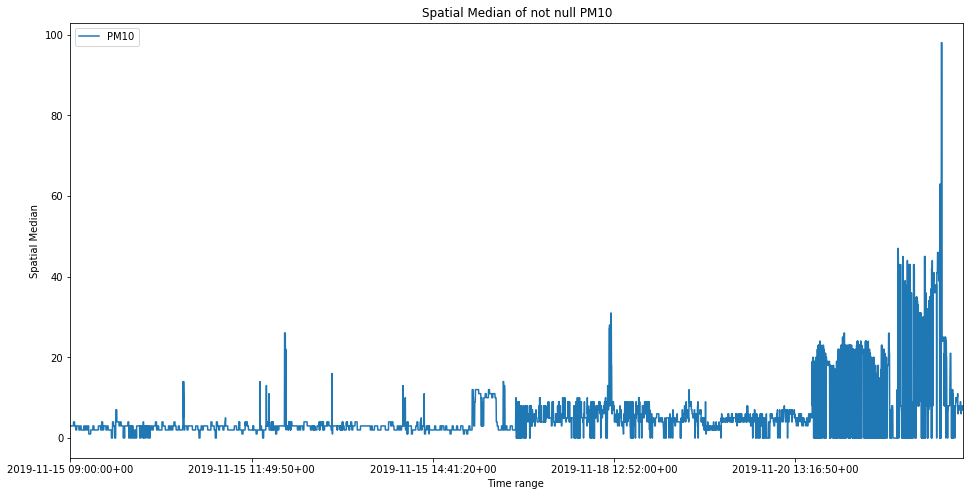

In [78]:
ax = dfsm['PM10'].plot(legend=True, figsize=(16, 8))
ax.set_xlabel("Time range ")
ax.set_ylabel("Spatial Median")
ax.set_title("Spatial Median of not null PM10")
plt.show()

In [83]:
temp_avg = df2.groupby('lat', 'lon')\
             .agg(F.avg('PM10').alias('mean_ta'))\
             .orderBy(F.col('lat'), F.col('lon')).cache()
temp_avg.show()

+----------------+----------------+-------+
|             lat|             lon|mean_ta|
+----------------+----------------+-------+
|48.7550316666667|         2.21463|    0.0|
|        48.75506|2.21514333333333|    0.0|
|       48.755135|2.21426666666667|    0.0|
|48.7552433333333|2.21386666666667|    0.0|
|48.7553316666667|2.21577833333333|    0.0|
|        48.75536|         2.21599|    0.0|
|48.7554733333333|2.21334833333333|    0.0|
|48.7554833333333|2.21333666666667|    0.0|
|48.7556566666667|2.21683833333333|    0.0|
|48.7556716666667|         2.21679|    0.0|
|48.7558316666667|2.21265833333333|    0.0|
|48.7561416666667|2.21764166666667|    0.0|
|48.7563316666667|2.21211666666667|    0.0|
|48.7564433333333|         2.21791|    0.0|
|48.7565066666667|2.21201333333333|    0.0|
|48.7566966666667|        2.218145|    0.0|
|48.7570866666667|2.21926666666667|    0.0|
|       48.757095|2.21092166666667|    0.0|
|48.7571583333333|2.21930666666667|    0.0|
|48.7573416666667|2.218696666666

In [84]:
temporal_avg_df = temp_avg.toPandas()
temporal_avg_df.describe()

lat           lon       mean_ta
count  31829.000000  31829.000000  31829.000000
mean      48.806239      2.141367      1.921452
std        0.028059      0.065732      5.546153
min       48.755032      1.721498      0.000000
25%       48.797288      2.131012      0.000000
50%       48.800988      2.141525      0.000000
75%       48.806118      2.146750      0.000000
max       48.939195      2.365902     98.000000

In [86]:
data = temporal_avg_df['mean_ta']
x = temporal_avg_df['lon']
y = temporal_avg_df['lat']

In [89]:
jet=plt.get_cmap('coolwarm') 
def plot_scatter(data, x, y):
    plt.scatter(x, y, c=data, cmap=jet, vmin=data.min(), vmax=data.max())
    plt.clim(data.min(), data.max())
    plt.colorbar()
    #plt.title('Temporal Average')
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

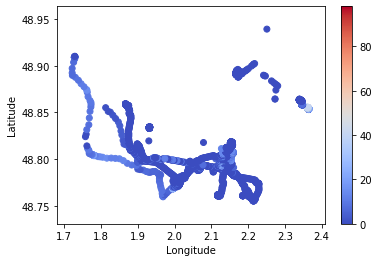

In [90]:
plot_scatter(data, x, y)

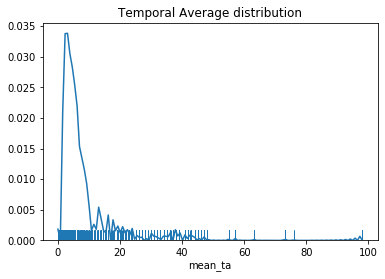

In [92]:
import seaborn as sns
# plot the distribution of the temporal mean
ax = sns.distplot(temporal_avg_df['mean_ta'], rug=True, hist=False)
ax.set_title("Temporal Average distribution")
plt.show()

In [93]:
states_pop = df_event.select(df_event['time'], df_event['PM10'].cast(IntegerType()))

In [94]:
states_pop = states_pop.sort(states_pop['PM10'].desc())
states_pop.show()

+--------------------+----+
|                time|PM10|
+--------------------+----+
|2019-11-21 09:42:...|  26|
|2019-11-21 09:42:...|  26|
|2019-11-21 09:42:...|  26|
|2019-11-21 10:45:...|  26|
|2019-11-21 09:42:...|  26|
|2019-11-21 09:42:...|  26|
|2019-11-21 10:45:...|  26|
|2019-11-21 10:45:...|  26|
|2019-11-21 09:42:...|  26|
|2019-11-21 10:45:...|  26|
|2019-11-21 10:45:...|  26|
|2019-11-21 10:45:...|  26|
|2019-11-21 09:40:...|  25|
|2019-11-21 09:40:...|  25|
|2019-11-21 09:40:...|  25|
|2019-11-21 09:40:...|  25|
|2019-11-21 09:40:...|  25|
|2019-11-21 09:40:...|  25|
|2019-11-21 09:11:...|  24|
|2019-11-21 10:00:...|  24|
+--------------------+----+
only showing top 20 rows



In [106]:
dfPM10 = df2.toPandas()

In [107]:
dfPM10.head()

kit_id  participant_id                    time        lat       lon  PM2  \
0      80         9999964  2019-11-14 09:02:20+00  48.771777  2.006005    0   
1      80         9999964  2019-11-14 09:11:40+00  48.771765  2.005903    0   
2      80         9999964  2019-11-14 09:21:20+00  48.771827  2.005928    0   
3      80         9999964  2019-11-14 09:55:00+00  48.771772  2.005990    0   
4      80         9999964  2019-11-14 10:29:40+00  48.771792  2.005985    0   

   PM10  PM1  NO2  BC  activity event  
0     0    0    0   0         0  NULL  
1     0    0    0   0         0  NULL  
2     0    0    0   0         0  NULL  
3     0    0    0   0         0  NULL  
4     0    0    0   0         0  NULL

In [ ]:
df0 = df_event.toPandas()
df0.plot()
display(plt.show())

In [ ]:

print(df_eventToPredict.count())

In [ ]:
# Evaluons les correlations de la variable cible 'event' avec les autres variables
corr_event_with_kit_id = df_data.corr("event","kit_id")
corr_event_with_participant_id = df_event.corr("event","participant_id")
#corr_event_with_time = df_event.corr("event","time")
corr_event_with_lat = df_data.corr("event","lat")
corr_event_with_lon = df_data.corr("event","lon")
corr_event_with_PM2 = df_data.corr("event","PM2")
corr_event_with_PM10 = df_data.corr("event","PM10")
corr_event_with_PM1 = df_data.corr("event","PM1")
corr_event_with_NO2 = df_data.corr("event","NO2")
corr_event_with_BC = df_data.corr("event","BC")
corr_event_with_activity = df_data.corr("event","activity")

list_Of_Correlation = [['kit_id',corr_event_with_kit_id],
                       ['participant_id',corr_event_with_participant_id],
                       ['lat',corr_event_with_lat],
                       ['lon',corr_event_with_lon],
                       ['PM2',corr_event_with_PM2],
                       ['PM10',corr_event_with_PM10],
                       ['PM1',corr_event_with_PM1],
                       ['NO2',corr_event_with_NO2],
                       ['BC',corr_event_with_BC],
                       ['activity',corr_event_with_activity]]

In [ ]:
print(list_Of_Correlation)

In [ ]:
df_data_ok = df_event.select(df_event.kit_id, df_event.lat, df_event.lon, df_event.PM2, df_event.PM10, df_event.PM1, df_event.NO2, df_event.BC,df_event.activity,df_event.event)

from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = ['kit_id', 'lon', 'BC'], outputCol = 'features')
df_data_ok = vectorAssembler.transform(df_data_ok)
df_data_ok = df_data_ok.select(['features', 'event'])
df_data_ok.show(3)

In [ ]:
splits = df_data_ok.randomSplit([0.8, 0.2])
train_data = splits[0]
test_data = splits[1]

In [ ]:
# Linear Regression
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='event', maxIter=6, regParam=0.3, elasticNetParam=0.6)
lr_model = lr.fit(train_data)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

In [ ]:
#Summarize the model over the training set and print out some metrics
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

In [ ]:
lr_predictions = lr_model.transform(test_data)

from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="event",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

In [ ]:
#Using our Linear Regression model to make some predictions:
predictions = lr_model.transform(test_data)
predictions.select("prediction","event","features").show()

In [ ]:
#Before you go, make sure to stop the SparkSession with the following line of code:
#spark.stop()

In [ ]:
df = df.toPandas()
df.plot()
display(plt.show())